# Problem statement
### Adult Salary Prediction

# Solved by:-                                                                                                       Iriventi Bharath Vasishta(CSC/20/36),                                                               Mohtasim Rahman(CSC/20/39),                                                                          Nikhil Choudhary(CSC/20/42). 

 Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.
 * We have been given 11 features.
 
 Adult dataset link : http://archive.ics.uci.edu/ml/datasets/Adult

In [110]:
import numpy as np  # For mathematical calculations
import pandas as pd  # For data preprocessing 
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For data visualization
from sklearn.preprocessing import StandardScaler  # For feature scaling
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For detecting multicollinearity
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score  # For evaluating model performance
from sklearn.tree import DecisionTreeClassifier  # For decision tree classification
from sklearn.ensemble import RandomForestClassifier  # For random forest classification
from sklearn.svm import SVC  # For support vector machine classification
from imblearn.over_sampling import SMOTE  # For oversampling the minority class
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings for cleaner output


In [111]:
df = pd.read_csv("adult_data.csv")
df.head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


In [112]:
df.columns

Index(['age', ' workclass', ' education', ' occupation', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [113]:
len(df.columns)

11

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    education       32561 non-null  object
 3    occupation      32561 non-null  object
 4    race            32561 non-null  object
 5    sex             32561 non-null  object
 6    capital-gain    32561 non-null  int64 
 7    capital-loss    32561 non-null  int64 
 8    hours-per-week  32561 non-null  int64 
 9    native-country  32561 non-null  object
 10   salary          32561 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [115]:
df.shape

(32561, 11)

In [116]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1077.648844,87.303830,40.437456
std,13.640433,7385.292085,402.960219,12.347429
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel=' salary', ylabel='count'>

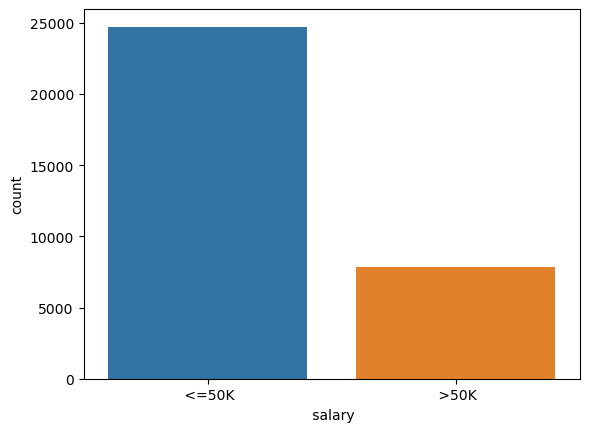

In [117]:
sns.countplot(x=' salary',data=df )

In [118]:
df[" salary"].value_counts()

 <=50K    24720
 >50K      7841
Name:  salary, dtype: int64

In [119]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [120]:
## Here we will check the missing values in our dataset
df.isnull().sum()

age                0
 workclass         0
 education         0
 occupation        0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [121]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [122]:
numerical

['age', ' capital-gain', ' capital-loss', ' hours-per-week']

In [123]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
  capital-gain  :  119
  capital-loss  :  92
  hours-per-week  :  94


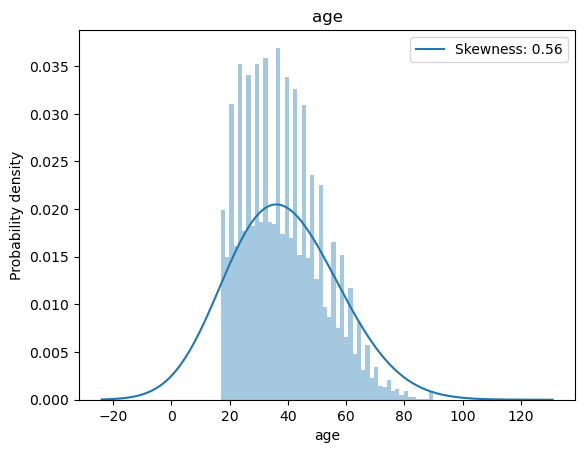

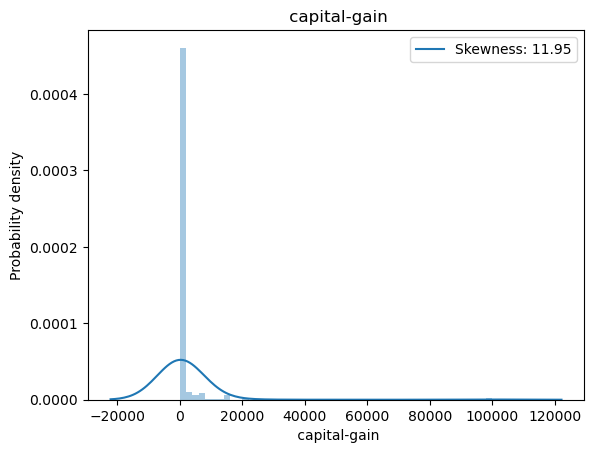

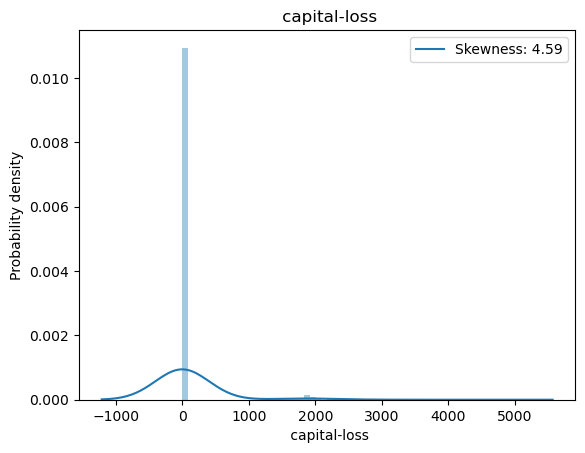

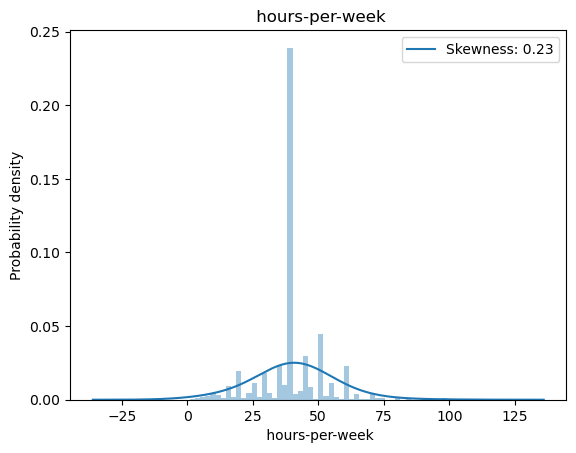

In [124]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [125]:
df["age"] = np.log(df["age"])

In [126]:
df.columns

Index(['age', ' workclass', ' education', ' occupation', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

## Handling categorical data 

In [127]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [128]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  9
  education  :  16
  occupation  :  15
  race  :  5
  sex  :  2
  native-country  :  42
  salary  :  2


In [129]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support       

## Handling missing values in categorical features

In [130]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [131]:
df[" occupation"].mode()[0]

' Prof-specialty'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [132]:
df[" workclass"] = df[' workclass'].str.replace('?', 'Private' )
df[' occupation'] = df[' occupation'].str.replace('?', 'Prof-specialty' )
df[' native-country'] = df[' native-country'].str.replace('?', 'United-States' )

In [133]:
# education Category
df[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [134]:
# income
df[" salary"] = df[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [135]:
df.head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,3.663562,State-gov,Bachelors,Adm-clerical,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,Bachelors,Exec-managerial,White,Male,0,0,13,United-States,0
2,3.637586,Private,HS-grad,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,3.970292,Private,school,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,3.332205,Private,Bachelors,Prof-specialty,Black,Female,0,0,40,Cuba,0


In [136]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

  workclass  :  8
  education  :  6
  occupation  :  14
  race  :  5
  sex  :  2
  native-country  :  41
  salary  :  2


In [137]:
df[" education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

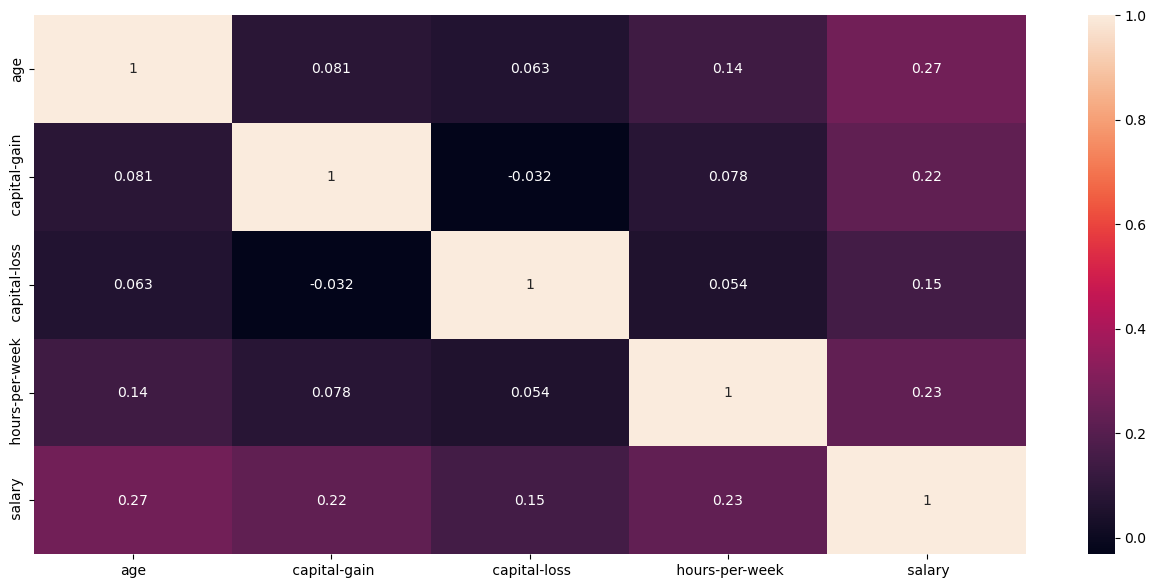

In [138]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [139]:
from sklearn.preprocessing import  LabelEncoder

In [140]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,education,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,6,0,0,4,1,25,0,39,38,0
1,33,5,0,3,4,1,0,0,12,38,0
2,21,3,2,5,4,1,0,0,39,38,0
3,36,3,5,5,2,1,0,0,39,38,0
4,11,3,0,9,2,0,0,0,39,4,0


# Pre Processing

In [141]:
# Preprocess the data for machine learning
target_name = ' salary'
y = df[target_name]
x_train = df.drop(target_name, axis=1)

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_res = sc.fit_transform(x_train)

In [143]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [144]:
# Calculate variance inflation factor (VIF) for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_res, i) for i in range(x_res.shape[1])]
vif["features"] = x_train.columns

In [145]:
# Display VIF for each feature
print("Variance Inflation Factor (VIF):")
pd.DataFrame(vif)

Variance Inflation Factor (VIF):


,VIF Factor,features
0,1.031483,age
1,1.008832,workclass
2,1.024136,education
3,1.003528,occupation
4,1.024756,race
5,1.079126,sex
6,1.036486,capital-gain
7,1.015167,capital-loss
8,1.084125,hours-per-week
9,1.016311,native-country


In [146]:
x_res.shape

(32561, 10)


# MODEL EVALUATION

# 1) Decision Tree Classifier

In [147]:

X_train, X_test, y_train, y_test = train_test_split(x_res, y, test_size=0.2, random_state=7)

# Print the shapes of training and testing sets
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (26048, 10)
y_train.shape: (26048,)
X_test.shape: (6513, 10)
y_test.shape: (6513,)


In [148]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on training and testing sets using Decision Tree Classifier
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [149]:
# Print accuracy scores and confusion matrix for Decision Tree Classifier
print('Train Accuracy:', accuracy_score(y_train, dt_train_pred) * 100)
print('Accuracy Score:', accuracy_score(y_test, dt_test_pred) * 100)

Train Accuracy: 95.98817567567568
Accuracy Score: 79.57930293259633


# Confusion Matrix

In [150]:
print(confusion_matrix(y_test, dt_test_pred))

[[4330  621]
 [ 709  853]]


In [151]:
#Classfication_report

In [152]:
print(classification_report(y_test, dt_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8593    0.8746    0.8669      4951
           1     0.5787    0.5461    0.5619      1562

    accuracy                         0.7958      6513
   macro avg     0.7190    0.7103    0.7144      6513
weighted avg     0.7920    0.7958    0.7937      6513



# Precision Score

In [153]:
print('Precision score of macro is: ' , round(precision_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('Precision score of micro is: ' , round(precision_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('Precision score of weighted is: ' , round(precision_score(y_test , dt_test_pred , average = 'weighted')*100,2))

Precision score of macro is:  71.9
Precision score of micro is:  79.58
Precision score of weighted is:  79.2


# Recall Score


In [154]:
print('recall_score score of macro is: ' , round(recall_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('recall_score score of micro is: ' , round(recall_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('recall_score score of weighted is: ' , round(recall_score(y_test , dt_test_pred , average = 'weighted')*100,2))

recall_score score of macro is:  71.03
recall_score score of micro is:  79.58
recall_score score of weighted is:  79.58


# F1 Score

In [155]:
print('f1_score score of macro is: ' , round(f1_score(y_test , dt_test_pred , average = 'macro')*100,2))
print('f1_score score of micro is: ' , round(f1_score(y_test , dt_test_pred , average = 'micro')*100,2))
print('f1_score score of weighted is: ' , round(f1_score(y_test , dt_test_pred , average = 'weighted')*100,2))

f1_score score of macro is:  71.44
f1_score score of micro is:  79.58
f1_score score of weighted is:  79.37


## 2)Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

82.84968524489483

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4951
           1       0.68      0.55      0.60      1562

    accuracy                           0.83      6513
   macro avg       0.77      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



# Confusion Matrix

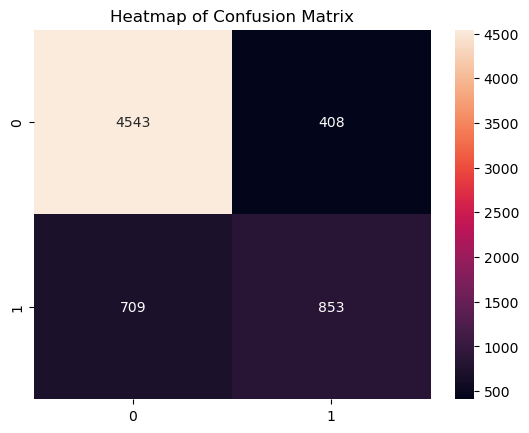

In [158]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

# 3)Support Vector Machine(SVM)

In [159]:
# Train Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on training and testing sets using SVC
svc_train_pred = svc_model.predict(X_train)
svc_test_pred = svc_model.predict(X_test)

In [160]:
# Print accuracy scores and confusion matrix for SVC
print('Train Accuracy:', accuracy_score(y_train, svc_train_pred) * 100)
print('Accuracy Score:', accuracy_score(y_test, svc_test_pred) * 100)

Train Accuracy: 82.8585687960688
Accuracy Score: 82.081989866421


# Confusion Matrix

In [161]:
print(confusion_matrix(y_test, svc_test_pred))

[[4777  174]
 [ 993  569]]


# Classification Report

In [66]:
print(classification_report(y_test, svc_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8279    0.9649    0.8911      4951
           1     0.7658    0.3643    0.4937      1562

    accuracy                         0.8208      6513
   macro avg     0.7969    0.6646    0.6924      6513
weighted avg     0.8130    0.8208    0.7958      6513



# Handling Imbalanced data

In [162]:
# Check value counts of y
print(y.value_counts())

0    24720
1     7841
Name:  salary, dtype: int64


In [163]:
# Apply SMOTE for handling imbalanced dataset
oversample = SMOTE(k_neighbors=4)
X_res1, y_res1 = oversample.fit_resample(x_res, y)

In [164]:
# Print shapes of resampled dataset
print("X_res1.shape:", X_res1.shape)
print("y_res1.shape:", y_res1.shape)

X_res1.shape: (49440, 10)
y_res1.shape: (49440,)


In [165]:
# Check value counts of original and resampled y
print("Original y value counts:")
print(y.value_counts())
print("Resampled y value counts:")
print(pd.Series(y_res1).value_counts())

Original y value counts:
0    24720
1     7841
Name:  salary, dtype: int64
Resampled y value counts:
0    24720
1    24720
Name:  salary, dtype: int64


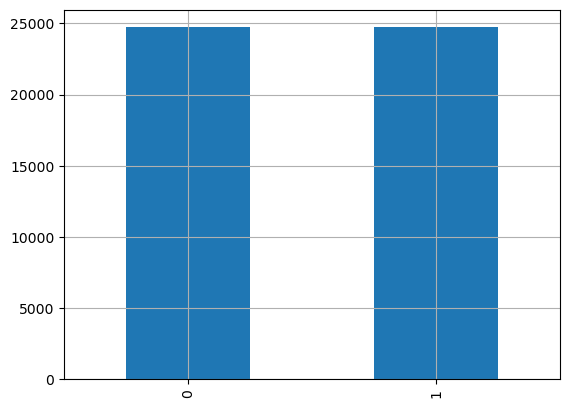

In [166]:
# Plot bar chart of resampled y value counts
pd.Series(y_res1).value_counts().plot.bar()
plt.grid()


# Retraining and Re-evaluation

# 1) Decision Tree Classifier

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_res1, y_res1, test_size=0.2, random_state=7)


print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (39552, 10)
y_train.shape: (39552,)
X_test.shape: (9888, 10)
y_test.shape: (9888,)


In [168]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

In [169]:
print('Decision Tree Classifier (after SMOTE) Train Accuracy: ', accuracy_score(y_train, dt_train_pred) * 100)
print('Decision Tree Classifier (after SMOTE) Accuracy Score: ', accuracy_score(y_test, dt_test_pred) * 100)

Decision Tree Classifier (after SMOTE) Train Accuracy:  96.93315129449837
Decision Tree Classifier (after SMOTE) Accuracy Score:  83.59627831715211


# Confusion Matrix

In [170]:
print(confusion_matrix(y_test, dt_test_pred))

[[4224  723]
 [ 899 4042]]


# Classfication Report

In [171]:
print(classification_report(y_test, dt_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8245    0.8539    0.8389      4947
           1     0.8483    0.8181    0.8329      4941

    accuracy                         0.8360      9888
   macro avg     0.8364    0.8360    0.8359      9888
weighted avg     0.8364    0.8360    0.8359      9888



# 2) Random Forest

In [172]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

86.5796925566343

# Classification Report

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4947
           1       0.87      0.86      0.86      4941

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



# Confusion Report

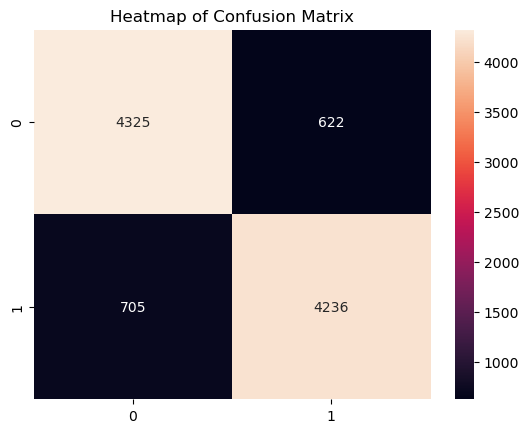

In [174]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

# 3)SVM

In [175]:
# Train Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Predict on training and testing sets using SVC
svc_train_pred = svc_model.predict(X_train)
svc_test_pred = svc_model.predict(X_test)

In [176]:
# Print accuracy scores and confusion matrix for SVC
print('Train Accuracy:', accuracy_score(y_train, svc_train_pred) * 100)
print('Accuracy Score:', accuracy_score(y_test, svc_test_pred) * 100)

Train Accuracy: 78.85821197411003
Accuracy Score: 78.47896440129449


# Confusion Report

In [177]:
print(confusion_matrix(y_test, svc_test_pred))

[[3752 1195]
 [ 933 4008]]


# Classification Report

In [178]:
print(classification_report(y_test, svc_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8009    0.7584    0.7791      4947
           1     0.7703    0.8112    0.7902      4941

    accuracy                         0.7848      9888
   macro avg     0.7856    0.7848    0.7846      9888
weighted avg     0.7856    0.7848    0.7846      9888

